In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import style
import random

style.use('fivethirtyeight')

### Input values and plotting

In [2]:
x = [1, 2, 3, 4, 5, 6]
y = [5, 4, 6, 5, 6, 7]

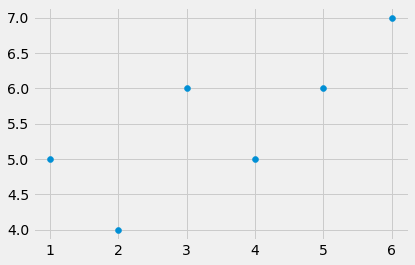

In [3]:
plt.scatter(x, y)

In [4]:
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

### slope and y-intercept fn
y = mx + c; m = slope and c = y-intercept

In [5]:
def slope(x, y):
    m = (sum((x - mean(x)) * (y - mean(y)))) / sum((x - mean(x))**2)
    
#     m = ((mean(x) * mean(y)) - mean(x*y)) / ((mean(x)**2) - mean(x**2))
    return m

In [6]:
m = slope(x, y)
m

0.42857142857142855

In [7]:
def y_intercept(x, y, m):
    return (mean(y) - m * mean(x))

In [8]:
c = y_intercept(x, y, m)
c

4.0

### Plotting the regression line or the line of best fit

In [9]:
def plot_regression_line(x, y, m, c):
    regression_line = []
    for i in x:
        regression_line.append(m*i+c)
    plt.scatter(x, y)
    plt.plot(regression_line)
    plt.show()
    return regression_line

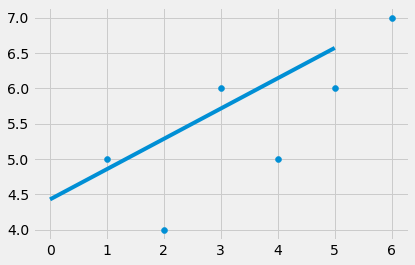

[4.428571428571429, 4.857142857142857, 5.285714285714286, 5.714285714285714, 6.142857142857142, 6.571428571428571]


In [10]:
regression_line = plot_regression_line(x, y, m, c)

print(regression_line)

### Predicting for random value of x

7.428571428571429


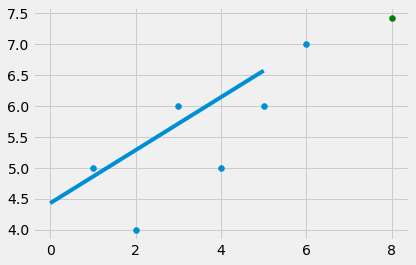

In [11]:
predict_x = 8
predict_y = m*predict_x+c
print(predict_y)

plt.scatter(x, y)
plt.scatter(predict_x, predict_y, color='green')
plt.plot(regression_line)
plt.show()

### Figuring out the mean square error

In [12]:
# returns r square value
def coefficient_of_determination(y, reg_line):
    return 1 - (sum((reg_line - y)**2) / sum([(mean(y) - i)**2 for i in y]))

In [13]:
r_squared = coefficient_of_determination(y, regression_line)
r_squared

0.5844155844155845

### Working the fn on randomly generated dataset

In [14]:
def create_dataset(n, variance, step=2, correlation=0):
    y = []
    val = 1
    for i in range(n):
        curr = val + random.randrange(-variance, variance)
        y.append(curr)
        if correlation and correlation == 1:
            val += step
        elif correlation and correlation == -1:
            val -= step
            
    x = [i for i in range(n)]
        
    return np.array(x, dtype=np.float64), np.array(y, dtype=np.float64)

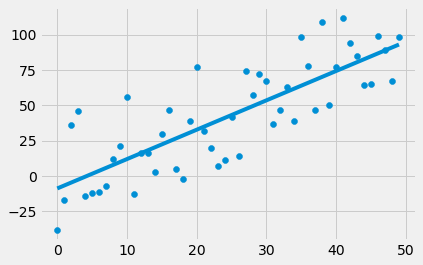

2.0772148859543815 -8.811764705882347
0.6410450860761758
[-8.811764705882347, -6.734549819927965, -4.6573349339735834, -2.580120048019202, -0.5029051620648204, 1.5743097238895611, 3.6515246098439427, 5.728739495798324, 7.805954381752706, 9.883169267707089, 11.960384153661469, 14.037599039615849, 16.114813925570232, 18.192028811524615, 20.269243697478995, 22.346458583433375, 24.423673469387758, 26.50088835534214, 28.578103241296525, 30.6553181272509, 32.732533013205284, 34.80974789915967, 36.886962785114044, 38.96417767106843, 41.04139255702281, 43.11860744297719, 45.19582232893158, 47.27303721488595, 49.350252100840336, 51.42746698679472, 53.504681872749096, 55.581896758703486, 57.65911164465786, 59.73632653061224, 61.81354141656663, 63.890756302521005, 65.96797118847539, 68.04518607442978, 70.12240096038414, 72.19961584633853, 74.27683073229292, 76.35404561824728, 78.43126050420167, 80.50847539015606, 82.58569027611043, 84.66290516206482, 86.74012004801921, 88.8173349339736, 90.894549

In [23]:
x, y = create_dataset(n=50, variance=40, step=2, correlation=1)

m = slope(x, y)

c = y_intercept(x, y, m)

line = plot_regression_line(x, y, m, c)

r_sq = coefficient_of_determination(y, line)

print(m, c)
print(r_sq)
print(line)